In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df = df.iloc[:,2:5]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
136,20,82000,0
335,36,54000,0
233,49,86000,1
186,20,82000,0
284,48,141000,0


In [ ]:
X = df.iloc[:,0:2]
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
y = df.iloc[:,2:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,Age,EstimatedSalary
91,30,116000
337,35,79000
324,48,131000
79,26,17000
123,35,53000
...,...,...
222,37,144000
69,31,68000
1,35,20000
266,40,75000


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
scaler.mean_

array([3.76000000e+01, 7.11214286e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_train_scaled

,Age,EstimatedSalary
0,-0.728029,1.311677
1,-0.249063,0.230269
2,0.996250,1.750086
3,-1.111202,-1.581820
4,-0.249063,-0.529639
...,...,...
275,-0.057476,2.130040
276,-0.632236,-0.091231
277,-0.249063,-1.494139
278,0.229904,0.113360


In [ ]:
X_test_scaled

,Age,EstimatedSalary
0,1.379424,-1.464911
1,-0.536442,0.844041
2,0.229904,0.025678
3,0.325697,-0.588094
4,0.038317,-0.003549
...,...,...
115,1.092044,-1.260321
116,-0.249063,-0.295821
117,-0.153269,0.814814
118,-0.632236,-0.383503


In [ ]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.800000e+02,2.800000e+02
mean,-1.459150e-16,1.776357e-16
std,1.001791e+00,1.001791e+00
min,-1.877549e+00,-1.640275e+00
25%,-8.238224e-01,-7.050029e-01
50%,-5.747598e-02,1.106460e-02
75%,8.046637e-01,4.933141e-01
max,2.145770e+00,2.305403e+00


In [ ]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,71121.4
std,10.5,34275.9
min,18.0,15000.0
25%,29.0,47000.0
50%,37.0,71500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.7
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


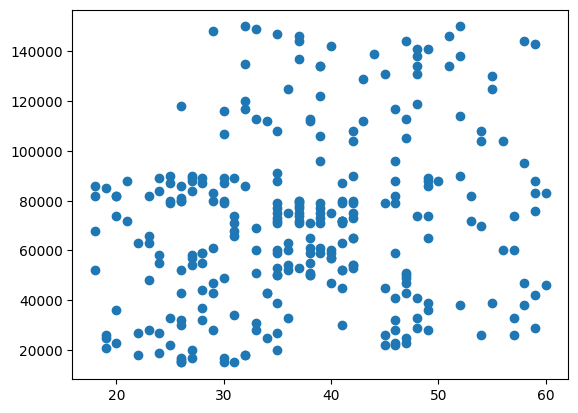

In [ ]:
plt.scatter(X_train['Age'],X_train['EstimatedSalary'])
plt.show()

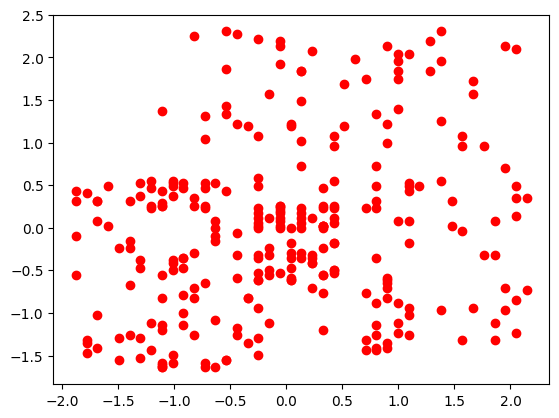

In [ ]:
plt.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

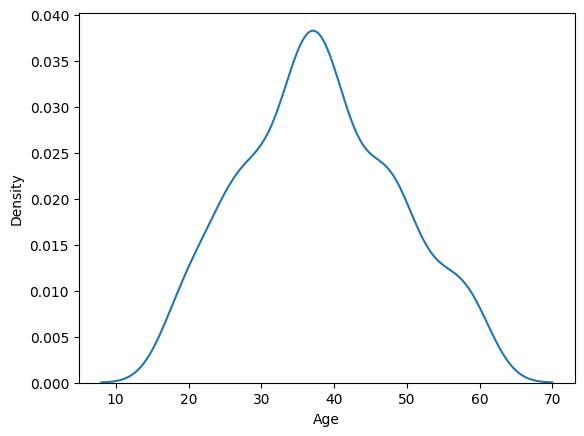

In [ ]:
sns.kdeplot(X_train['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

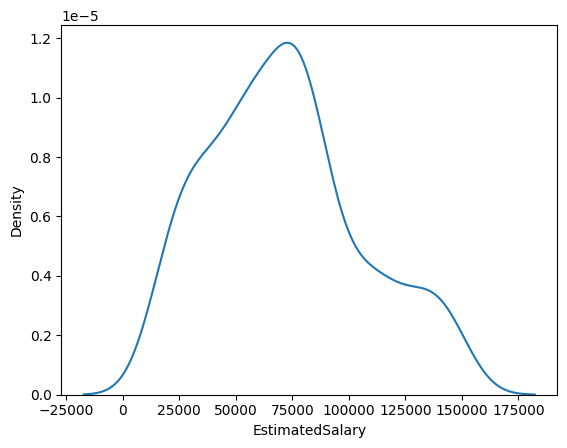

In [ ]:
sns.kdeplot(X_train['EstimatedSalary'])

<Axes: xlabel='Age', ylabel='Density'>

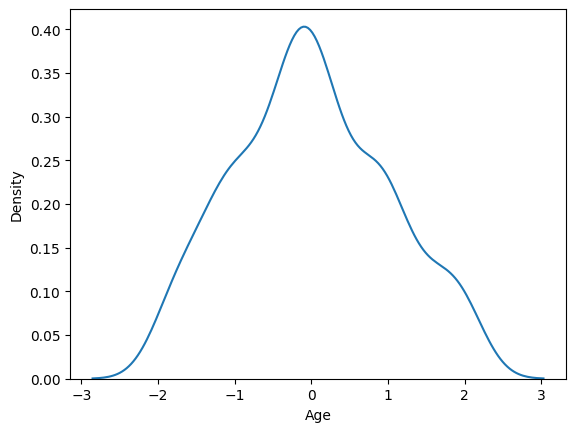

In [ ]:
sns.kdeplot(X_train_scaled['Age'])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

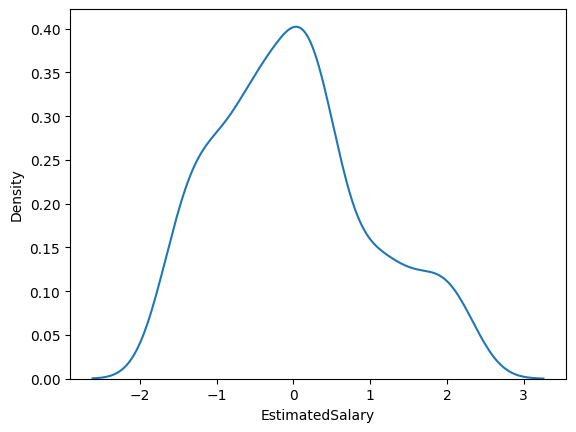

In [ ]:
sns.kdeplot(X_train_scaled['EstimatedSalary'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy score without scaling", accuracy_score(y_pred,y_test))

The accuracy score without scaling 0.375


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test_scaled)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy after scaling is",accuracy_score(y_test,y_pred))

The accuracy after scaling is 0.7916666666666666
